# 🧪 Pharmaceutical Data Analysis Project
**Objective:** Analyze prescription and return behavior to optimize sales strategy, inventory control, and profitability in a pharmaceutical environment.

In [1]:
pip install pandas numpy matplotlib seaborn scipy


Note: you may need to restart the kernel to use updated packages.


### 🔧 Tools & Techniques Used
- Python (Pandas, NumPy)
- Excel
- Descriptive & Inferential Statistics
- Regression Modeling
- Visualization (Matplotlib/Seaborn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned data
df = pd.read_excel(r"C:\Users\Admin\Desktop\Project\Project_Pharma _ANUP\Medical Inventory Optimization Dataset-Cleaned.xlsx")
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1,Net_Sales,Return_Rate
0,Sale,12018098765,Specialisation6,Department1,2022-01-06,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS,59.260,0.0
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES,950.800,0.0
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM,4004.214,0.0
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS,81.044,0.0
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM,40.504,0.0


## 📊 Descriptive Statistics
Understanding key metrics like Quantity, Final Cost, Final Sales, and Return Rate.

In [3]:
df.describe()[['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'Net_Sales', 'Return_Rate']]

,Quantity,ReturnQuantity,Final_Cost,Final_Sales,Net_Sales,Return_Rate
count,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.0
mean,1.922904,0.192905,133.586433,238.587937,218.320650,inf
min,0.000000,0.000000,40.000000,0.000000,-8014.000000,0.0
25%,1.000000,0.000000,44.928000,47.860000,47.860000,0.0
50%,1.000000,0.000000,54.292000,87.800000,87.800000,0.0
75%,2.000000,0.000000,83.680000,181.000000,181.000000,0.0
max,150.000000,20.000000,33178.000000,39490.000000,39490.000000,inf
std,3.572569,0.831124,500.368301,702.536463,725.576951,NaN


### 🔝 Top 10 Most Sold Drugs by Quantity

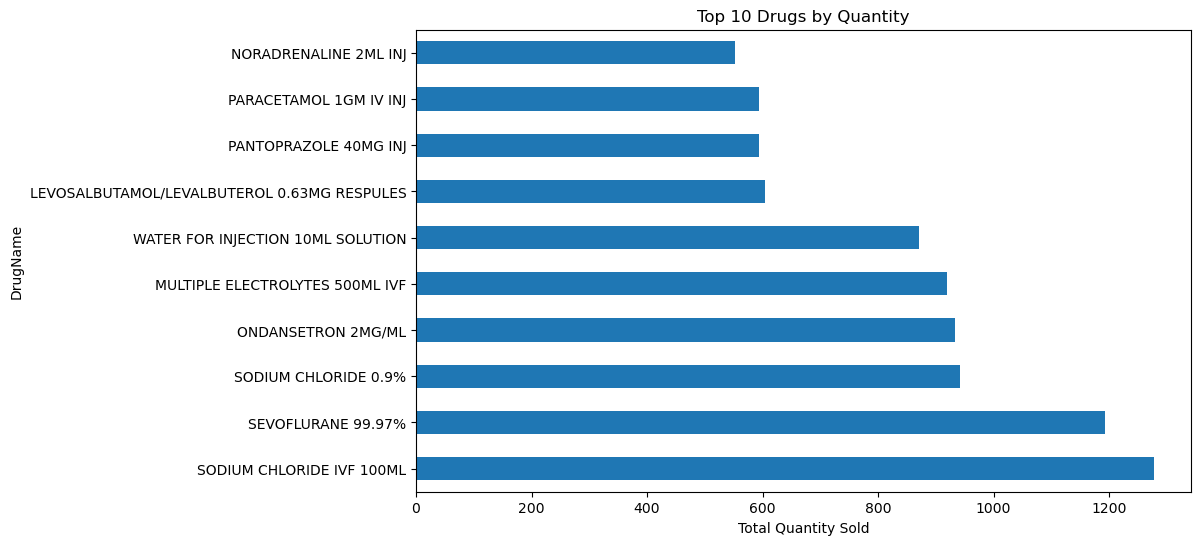

In [4]:
top_drugs = df.groupby('DrugName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_drugs.plot(kind='barh', title='Top 10 Drugs by Quantity', figsize=(10, 6))
plt.xlabel('Total Quantity Sold')
plt.show()

## 🔄 Return Rate Analysis
Which drug types or departments experience the highest return rate?

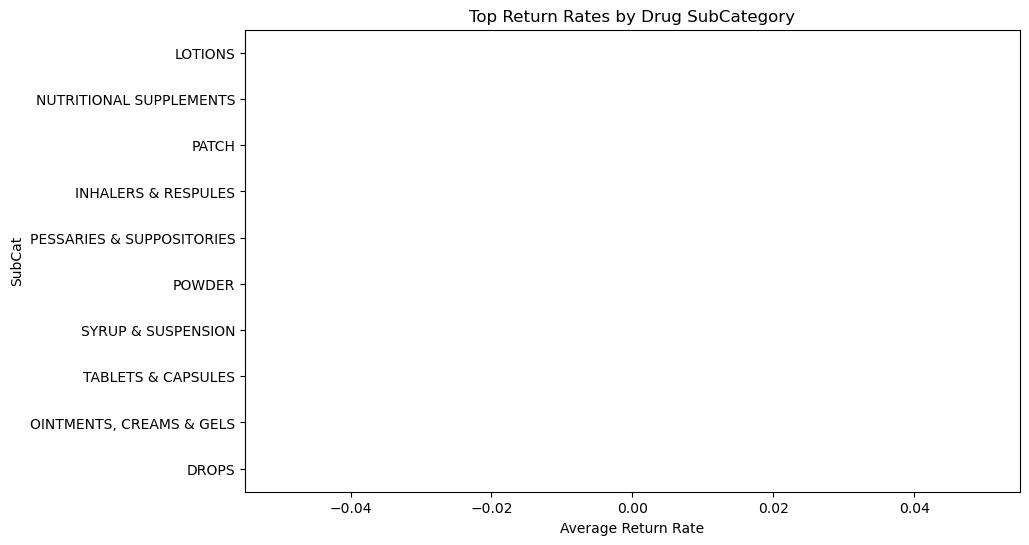

In [5]:
return_by_category = df.groupby('SubCat')['Return_Rate'].mean().sort_values(ascending=False).head(10)
return_by_category.plot(kind='barh', title='Top Return Rates by Drug SubCategory', figsize=(10,6))
plt.xlabel('Average Return Rate')
plt.show()

## 🧪 Hypothesis Testing
Do injectable drugs get returned more than tablets?

In [6]:
inj = df[df['SubCat'].str.contains('INJECTION')]['Return_Rate']
tab = df[df['SubCat'].str.contains('TABLET')]['Return_Rate']

# t-test
t_stat, p_val = stats.ttest_ind(inj.dropna(), tab.dropna(), equal_var=False)
print(f'T-Test Result: t={t_stat:.4f}, p={p_val:.4f}')

T-Test Result: t=nan, p=nan


C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2


## 📈 Regression Modeling
Predict Net Sales using Quantity, Return Quantity and encoded Department.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_model = df[['Quantity', 'ReturnQuantity', 'Dept', 'Net_Sales']].dropna()
le = LabelEncoder()
df_model['Dept'] = le.fit_transform(df_model['Dept'])

X = df_model[['Quantity', 'ReturnQuantity', 'Dept']]
y = df_model['Net_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f'Model R² Score: {r2:.4f}')

Model R² Score: 0.0713


### 📆 Monthly Sales Trend

C:\Users\Admin\AppData\Local\Temp\ipykernel_2564\2225566937.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Dateofbill').resample('M')['Net_Sales'].sum()


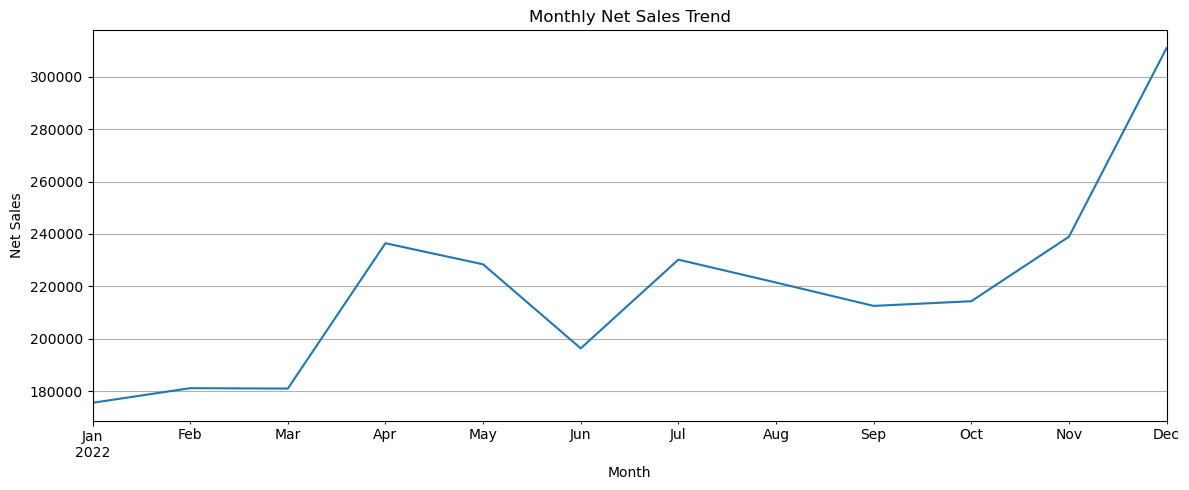

In [9]:
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'], errors='coerce')
monthly_sales = df.set_index('Dateofbill').resample('M')['Net_Sales'].sum()
monthly_sales.plot(figsize=(12, 5), title='Monthly Net Sales Trend')
plt.ylabel('Net Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

### 🏥 Net Sales by Department

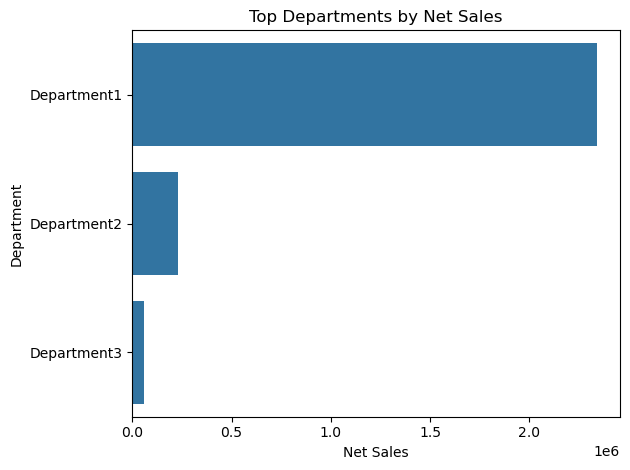

In [10]:
dept_sales = df.groupby('Dept')['Net_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=dept_sales.values, y=dept_sales.index)
plt.title('Top Departments by Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

### 📉 Return Rate Distribution

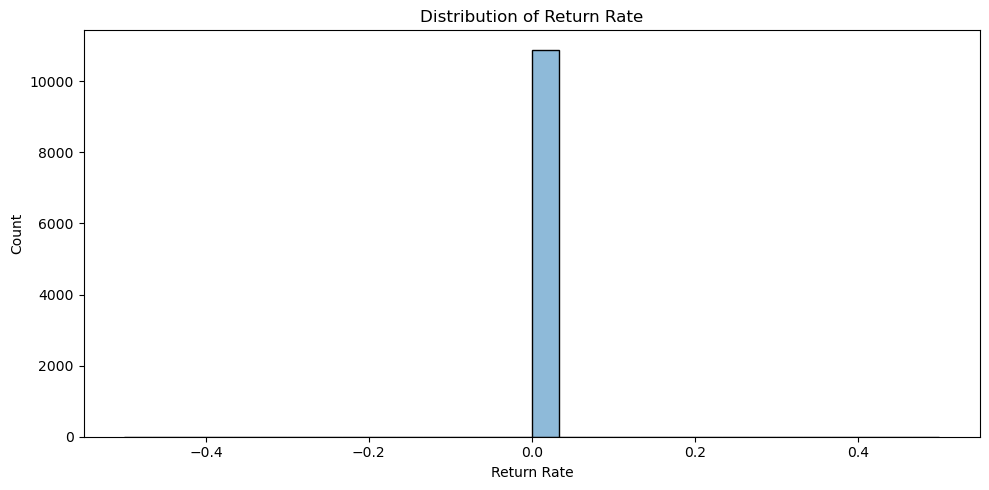

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Return_Rate'], bins=30, kde=True)
plt.title('Distribution of Return Rate')
plt.xlabel('Return Rate')
plt.tight_layout()
plt.show()